In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

Дадим названия признакам

In [3]:
df_d_column = [
    'id', 'diagnosis', 'radius',
    'texture','perimeter','area',
    'smoothness','compactness','concavity',
    'concave_points','symmetry','fractal_dimension',
    'radius_se','texture_se','perimeter_se',
    'area_se','smoothness_se','compactness_se',
    'concavity_se','concave_points_se','symmetry_se',
    'fractal_dimension_se','radius_worst','texture_worst',
    'perimeter_worst','area_worst','smoothness_worst',
    'compactness_worst','concavity_worst','concave_points_worst',
    'symmetry_worst','fractal_dimension_worst'
 ]



In [55]:
df_d = pd.read_csv('wdbc.data',header=0, names=df_d_column, index_col=0)

In [5]:
df_d.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Посмотрим количество и соотношение классов

Text(0, 0.5, 'Count objects')

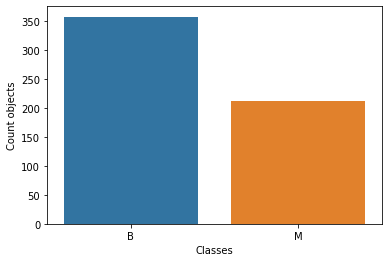

In [97]:
count_calss = df_d['diagnosis'].value_counts()
sns.barplot(x=count_calss.index, y=count_calss.values)
plt.xlabel('Classes')
plt.ylabel('Count objects')

Проверим есть ли пропуски в данных

In [98]:
df_d.isnull().sum()

diagnosis                  0
radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave_points             0
symmetry                   0
fractal_dimension          0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

посмотрим распределение

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a4dd86a20>,
      dtype=object)

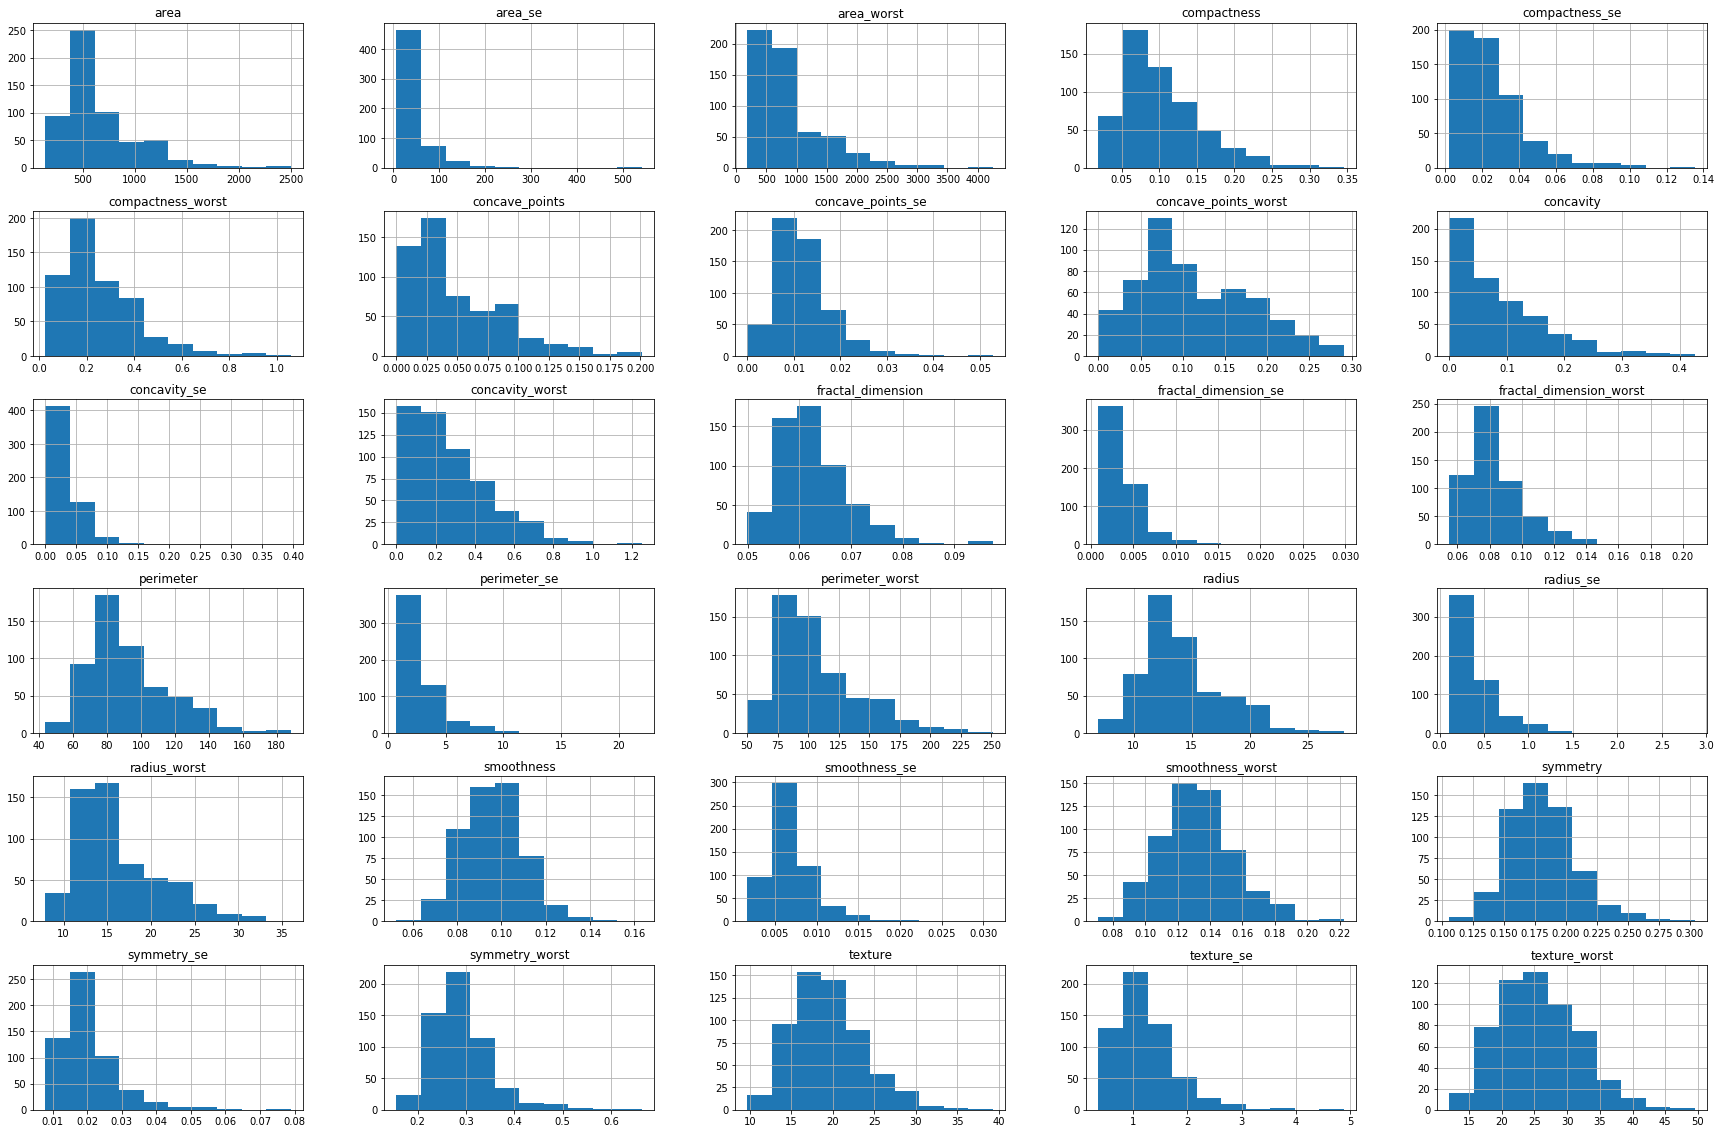

In [102]:
df_d.hist(figsize=(30, 20))

матрица корреляции

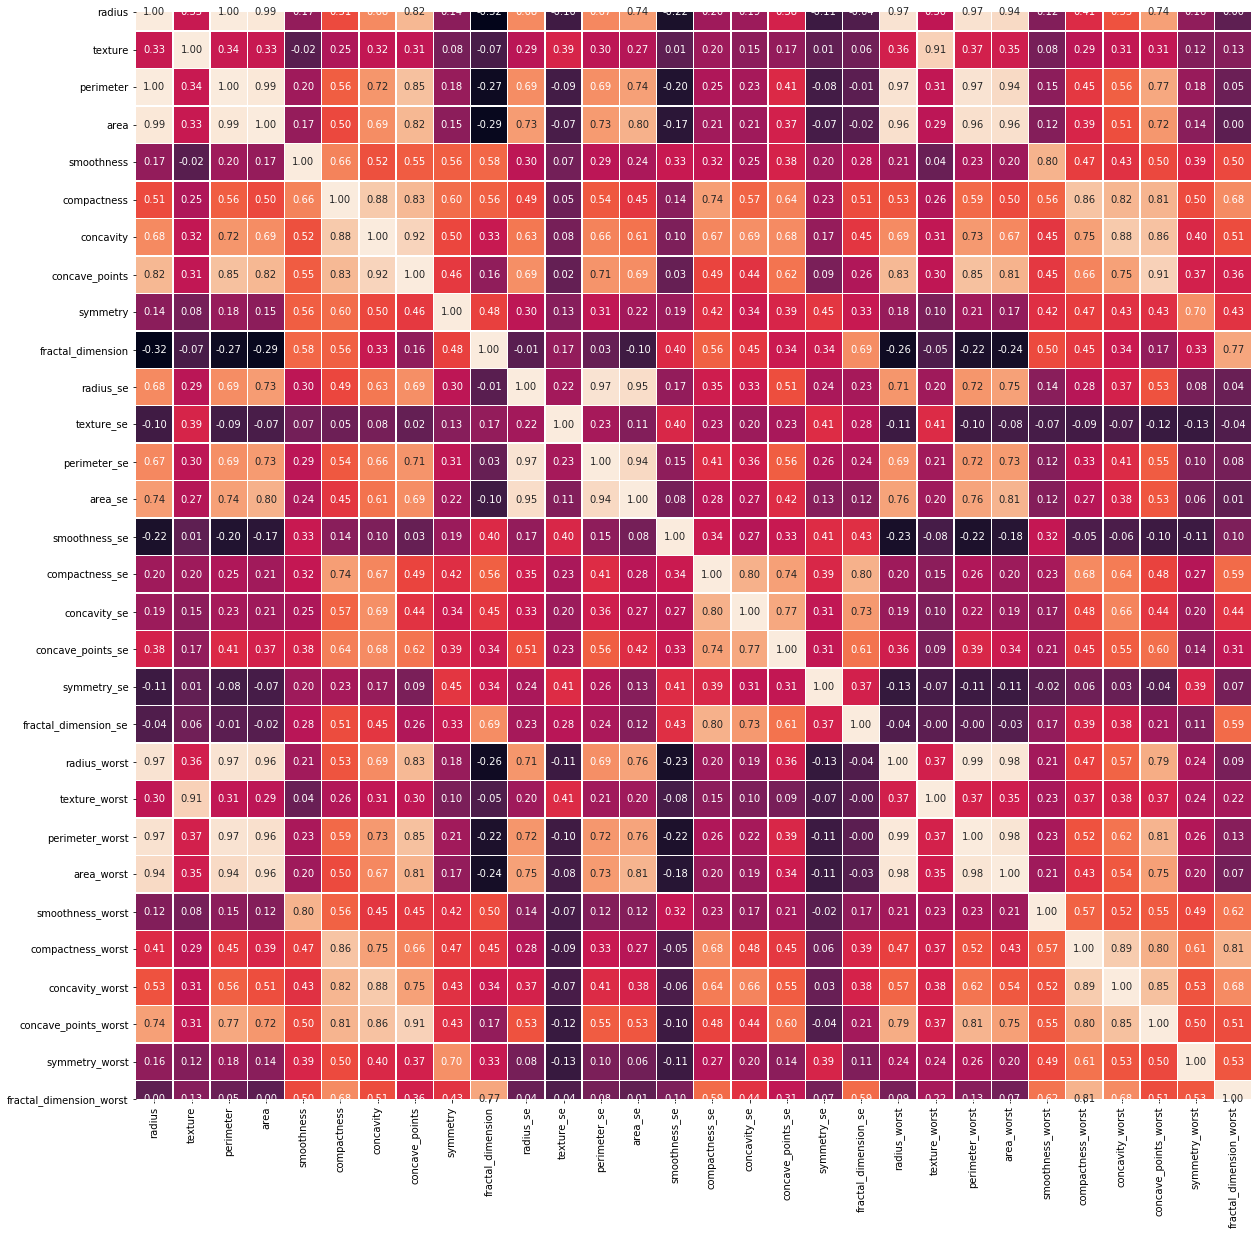

In [145]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_d.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')

посморим есть ли анамалии

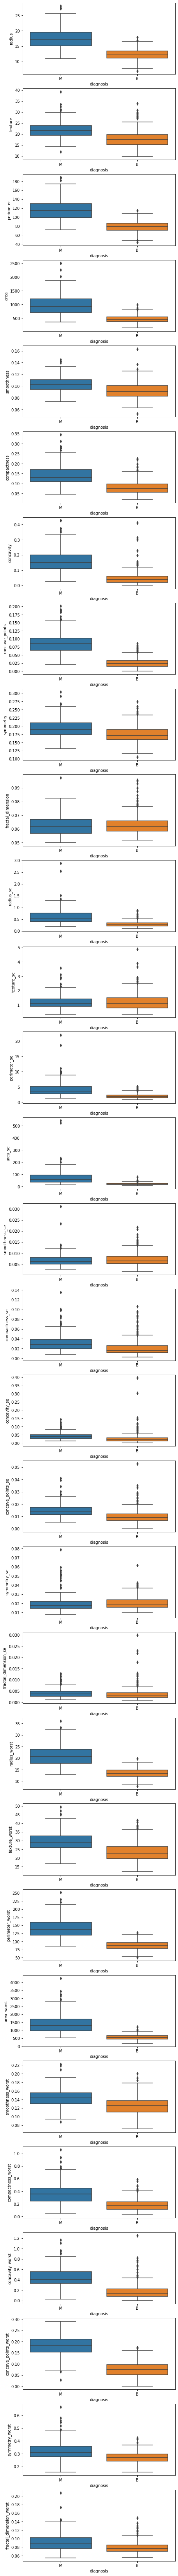

In [189]:

columns = df_d.columns.drop(['diagnosis'])
fig, axes = plt.subplots(len(columns),1,figsize=(7,120))

for axi, column in enumerate(columns):
    sns.boxplot(x='diagnosis', y=column, data=df_d, ax=axes[axi])

Обучим модель методом ближайших соседей

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_d['diagnosis']=df_d['diagnosis'].map({'M':0, 'B':1})
y = df_d['diagnosis']
X = df_d.drop('diagnosis', axis=1)

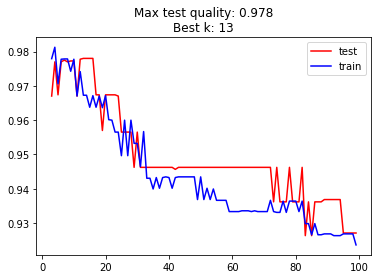

In [94]:

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42, stratify=df_d['diagnosis'])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

precision_train = []
precision_test = []

for i in range(3, 100):
    cl = KNeighborsClassifier(n_neighbors=i)
    cl.fit(X_train_s, y_train)
    precision_train.append(precision_score(y_train, cl.predict(X_train_s)))
    precision_test.append(precision_score(y_test, cl.predict(X_test_s)))

plt.plot(range(3,100), precision_test, color='red', label='test')
plt.plot(range(3,100), precision_train, color='blue', label='train')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(precision_test), np.argmax(precision_test)+3))
plt.legend()

обучим моделью случайных деревьев


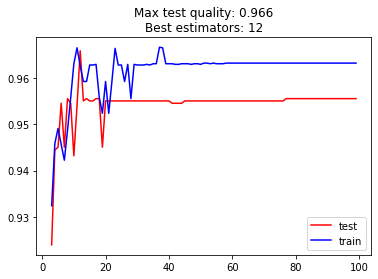

In [101]:
from sklearn.ensemble import RandomForestClassifier

precision_train = []
precision_test = []

for i in range(3, 100):
    cl = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=i)
    cl.fit(X_train_s, y_train)
    precision_train.append(precision_score(y_train, cl.predict(X_train_s)))
    precision_test.append(precision_score(y_test, cl.predict(X_test_s)))

plt.plot(range(3,100), precision_test, color='red', label='test')
plt.plot(range(3,100), precision_train, color='blue', label='train')
plt.title("Max test quality: {:.3f}\nBest estimators: {}".format(max(precision_test), np.argmax(precision_test)+3))
plt.legend()

KNN и RandomForest дают примерно одинаковое качество на этом наборе данных